In [1]:
using Plots
using Plots.PlotMeasures
using HDF5
using Distributed
pyplot()
const mass = 2000

2000

In [2]:
####### LOAD FROM INITIAL FILE
input_name="225_1"

"225_1"

In [3]:
cd("../")

In [4]:
############################# LOAD SAVE FILES
include("./Initial_data/"*input_name*".jl")
file="./data/"*potname*"_R0($R0)_p0($p0).h5"

┌ Info: Recompiling stale cache file /home/nacho/.julia/compiled/v1.1/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184
┌ Warning: Package Distributions does not have Test in its dependencies:
│ - If you have Distributions checked out for development and have
│   added Test as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Distributions
└ Loading Test into Distributions from project dependency, future warnings for Distributions are suppressed.


"./data/layered_03_R0(-22.5)_p0(0).h5"

In [ ]:
###### LOAD FROM ZERO
include("potentials.jl")
include("types.jl")
include("adiabatic_values.jl")
include("type_builder.jl")
include("plotting.jl")

In [19]:
p0

0

In [20]:
R0

-23.5

In [49]:
C0[1]=1
C0[11]=0

0

In [29]:
potential(R)=pot_thirty_states(R)
nsts=30
R0=1
p0=20
C0=zeros(Complex,nsts)
C0[1]=1

1

In [5]:
################################ ENERGY STUFF
xmin=-24;
xmax=24;
res=1000;

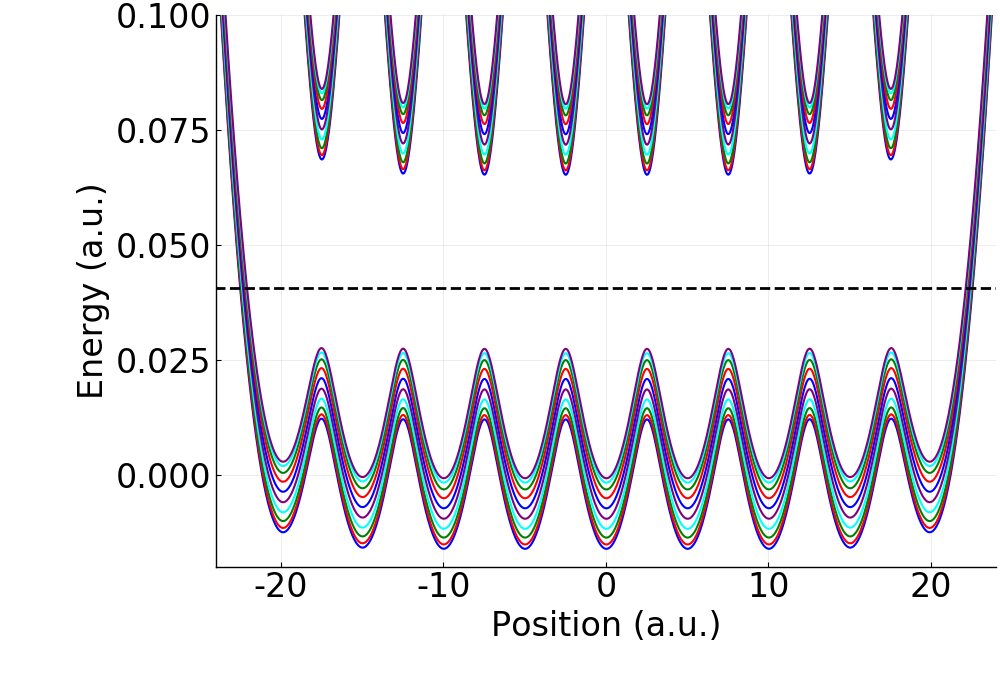

In [8]:
#PLOT ENERGY WITHOUT COUPLINGS
R=all_4_1D_plot(xmin,xmax,res);
Xbase=R[:,1];
E=R[:,2:1+nsts];
S_EH=EH_state_builder(R0,p0,C0)
Ep0,~,~,~,~,~=adiabatic_values(R0);
E0=real(C0'*Diagonal(Ep0)*C0)[1]+p0^2/2/mass;
############### ENERGY PLOTS
COLOURS=[:blue,:red,:green,:cyan,:purple];
GUIDEFONT=font(24,"Helvetica");
TICKFONT=font(24,"Helvetica");
P=plot(Xbase,E[:,1],line=(1.5,:solid),color=:blue)
for i in 2:nsts
    plot!(Xbase,E[:,i],line=(1.5,:solid),color=COLOURS[mod1(i,length(COLOURS))])
end
plot!(x->E0,line=(2.0,:dash),colour=:black);
plot!(xlabel="Position (a.u.)",ylabel="Energy (a.u.)",xlims=(xmin,xmax));
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT);
plot!(legend=false);
ylims!(-0.02,0.10)
L_MARG=[20mm 0mm]
B_MARG=[15mm 0mm]
SIZE=[1000,700]
plot!(left_margin=L_MARG,bottom_margin=B_MARG,size=SIZE)
#ylims!(-0.1,0.5)
P

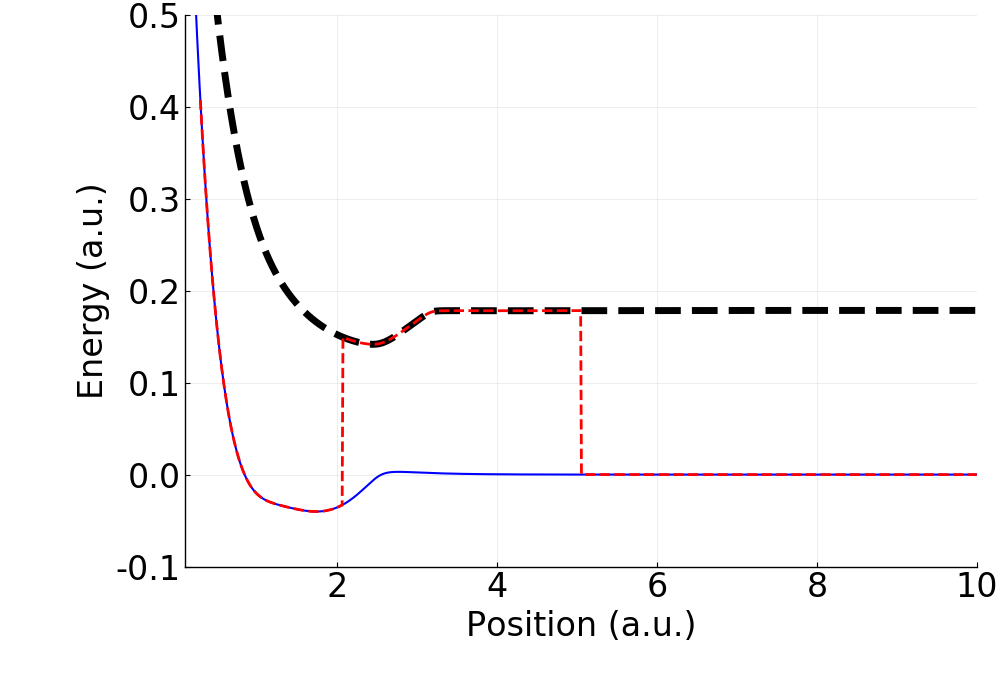

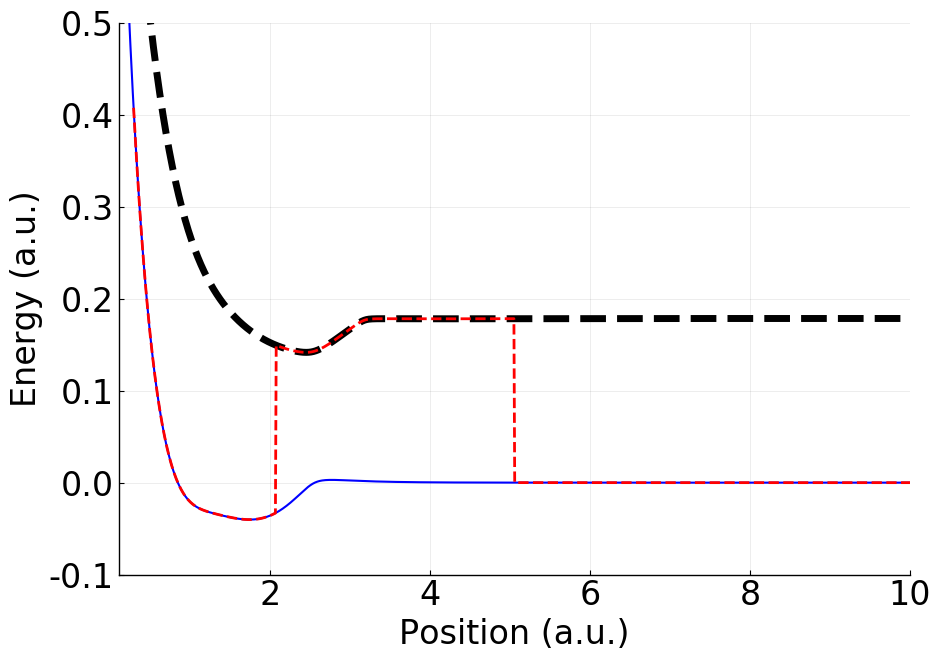

In [82]:
Ees=zeros(res)
C=zeros(30)
C[2]=0.7
resto=1-C[2]^2
Ck=sqrt(resto/27)
C[3:end].=Ck
P=plot(Xbase,E[:,1],line=(1.5,:solid),color=:blue)
plot!(xlabel="Position (a.u.)",ylabel="Energy (a.u.)",xlims=(xmin,xmax));
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT);
plot!(legend=false);
ylims!(-0.1,0.5)
L_MARG=[20mm 0mm]
B_MARG=[15mm 0mm]
SIZE=[1000,700]
plot!(left_margin=L_MARG,bottom_margin=B_MARG,size=SIZE)
for i in 1:res
    Ees[i]=sum(E[i,2:end].*abs2.(C[2:end]))
end
Esh=E[:,1]
for i in 200:500
    Esh[i]=Ees[i]
end
plot!(Xbase,Ees,line=(5,:dash),colour=:black)
plot!(Xbase[20:end],Esh[20:end],line=(2,:dash),colour=:red)
#for i in 6:10:nsts
#    plot!(X,Es[i,:],line=(2.5,:dash),colour=:black)
#end
#plot!(X,Es[i,:],line=(1.5,:solid),color=COLOURS[mod1(i,length(COLOURS))])

display(P)

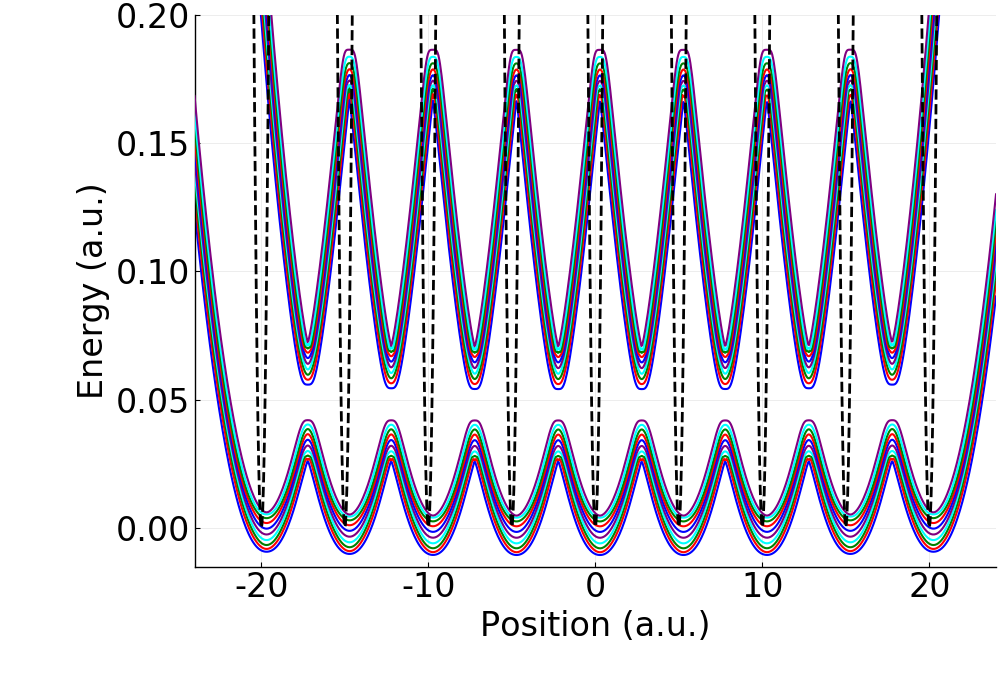

In [24]:
P

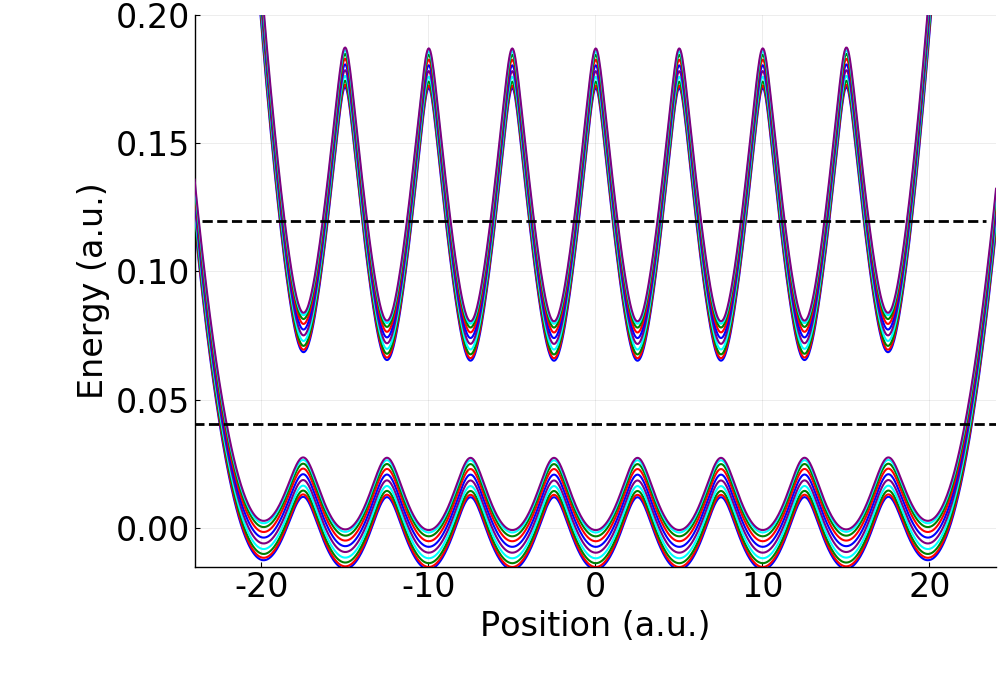

In [15]:
Ep0,~,~,~,~,~=adiabatic_values(-24)
#C0[1]=0
#C0[11]=1
E0=real(C0'*Diagonal(Ep0)*C0)[1]+p0^2/2/mass;
plot!(x->E0,line=(2.0,:dash),colour=:black);
#scatter!([-9],[E0],marker=(:+,50),color=:black);
#scatter!([-9],[E0],marker=(:x,30),color=:black);
display(P)

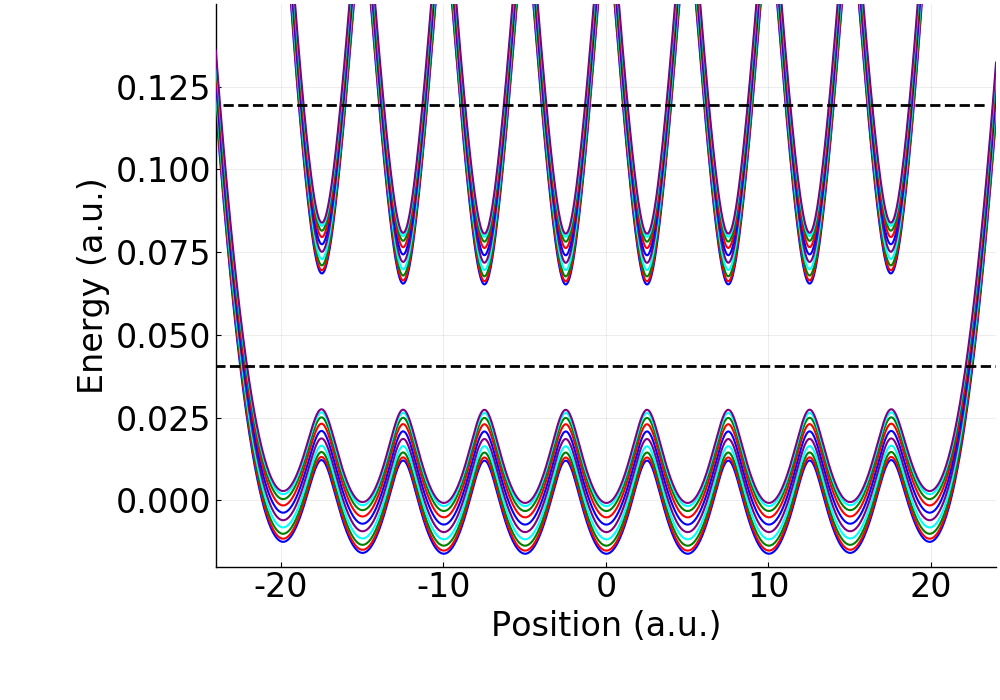

In [83]:
ylims!(-0.02,0.15)

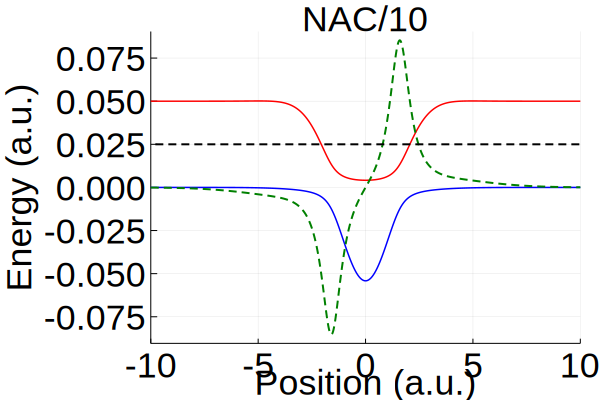

In [15]:
#PLOT WITH COUPLINGS
R=all_4_1D_plot(xmin,xmax,res,1,2);
Xbase=R[:,1];
E=R[:,2:1+nsts];
G=R[:,2+nsts:end];
num_couplings=length(G[1,:])
S_EH=EH_state_builder(R0,p0,C0)
Ep0,~,~,~,~,~=adiabatic_values(R0);
E0=real(C0'*Diagonal(Ep0)*C0)[1]+p0^2/2/mass;
############### ENERGY PLOTS
COLOURS=[:blue,:red,:green,:cyan,:purple];
GUIDEFONT=font(24,"Helvetica");
TICKFONT=font(24,"Helvetica");
P=plot(Xbase,E[:,1],line=(1.5,:solid),color=:blue)
for i in 2:nsts
    plot!(Xbase,E[:,i],line=(1.5,:solid),color=COLOURS[mod1(i,length(COLOURS))])
end
NACfact=10
for i in 1:num_couplings
    plot!(Xbase,G[:,i]/NACfact,line=(2.0,:dash),color=:green)
end
plot!(x->E0,line=(2.0,:dash),colour=:black);
plot!(xlabel="Position (a.u.)",ylabel="Energy (a.u.)",xlims=(xmin,xmax));
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT);
plot!(legend=false);
title!("NAC/$NACfact",titlefont = GUIDEFONT)
#ylims!(-0.011,0.1)
P
#yaxis!()

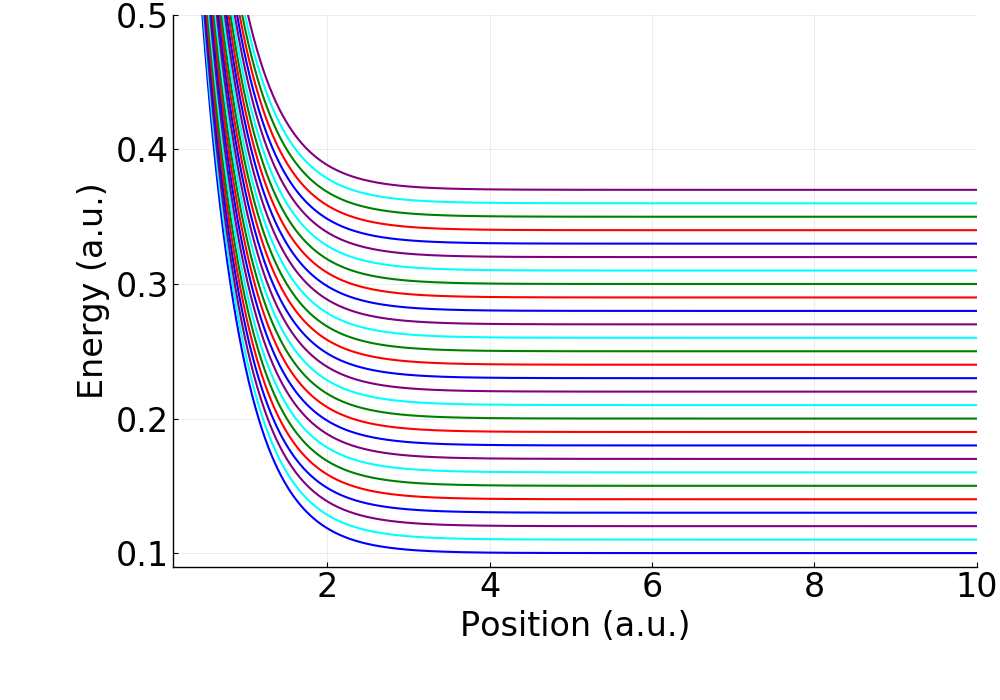

In [77]:
X=range(xmin,stop=xmax,length=1000)
Es=zeros(nsts,1000)
for (i,x) in enumerate(X)
    H,_=potential(x)
    for st in 1:nsts
        Es[st,i]=H[st,st]
    end
end

P=plot(X,Es[3,:],line=(1.5,:solid),color=:blue)
for i in 4:nsts
    plot!(X,Es[i,:],line=(1.5,:solid),color=COLOURS[mod1(i,length(COLOURS))])
end
#plot!(x->E0,line=(2.0,:dash),colour=:black);
plot!(xlabel="Position (a.u.)",ylabel="Energy (a.u.)",xlims=(xmin,xmax));
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT);
plot!(legend=false);

L_MARG=[20mm 0mm]
B_MARG=[15mm 0mm]
SIZE=[1000,700]
plot!(left_margin=L_MARG,bottom_margin=B_MARG,size=SIZE)
ylims!(0.09,0.5)
P

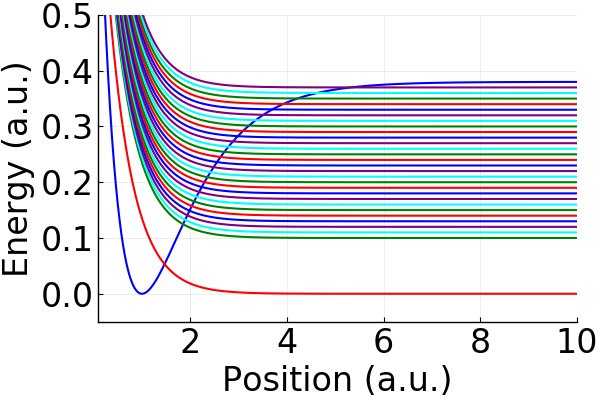

In [43]:
ylims!(-0.05,0.50)
display(P)

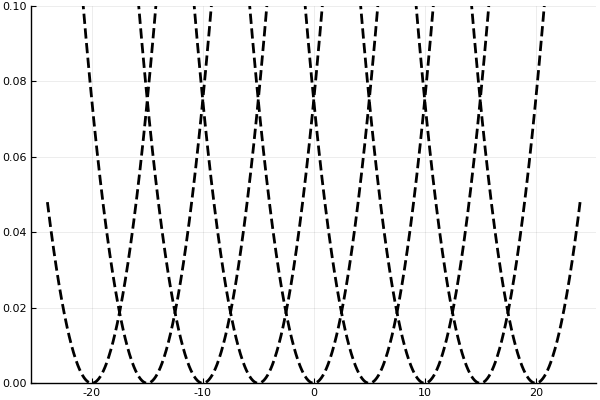

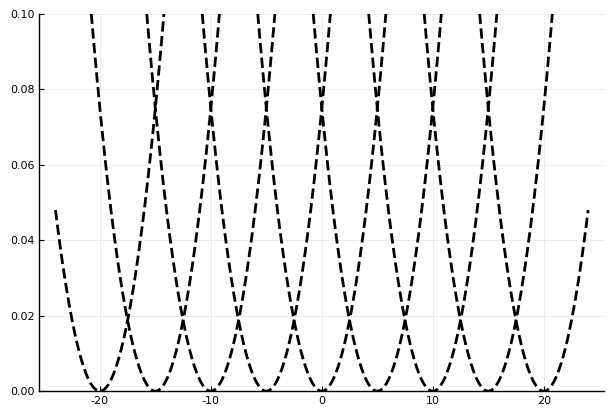

In [35]:
P=plot()
for d in [-20,-15,-10,-5,0,5,10,15,20]
    plot!(Xbase,x->0.003*(x-d)^2,line=(2,:dash),colour=:black)
end
plot!(legend=false)
ylims!(0,0.1)
display(P)